In [390]:
import pandas as pd
import numpy as np
import datetime 
import math
from matplotlib import pyplot as plt
import scipy

In [391]:
%cd ..

c:\Users\Frank\OneDrive\Documents\git


In [392]:
%reload_ext autoreload
%autoreload 2

In [393]:
from bnc_tms import tms

In [394]:
#Dummy dates
ndays = int(60 * 7/5)
base = datetime.date.today()
dates = [base - datetime.timedelta(days = n) for n in range(ndays)]
dates = np.array([x for x in dates if x.weekday() not in [5,6]])

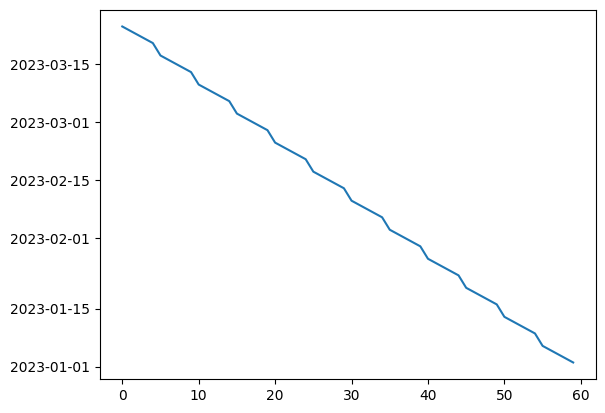

In [395]:
plt.plot(dates)

In [410]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/5)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

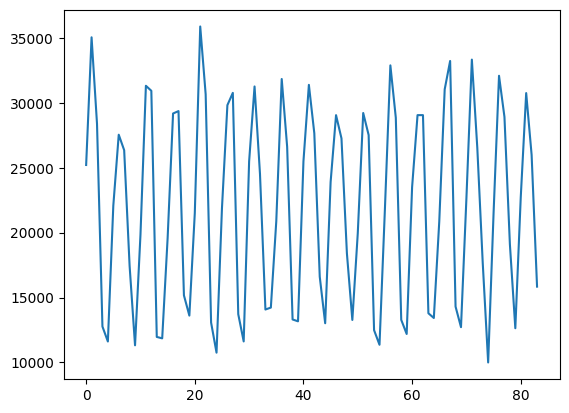

In [411]:
plt.plot(nrows)

In [412]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [413]:
tms_model = tms.timeseries_model(df, 0.05)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.72
Test alpha: 0.05
Observed volume: 25209.0
Expected volume: 28781.1967
0.95 CI: [22080.4942 35481.8992]
p-value: 0.2961
Result: PASS
------------------------------------------
